In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import datetime

df = pd.read_csv("Food_Delivery_Time_Prediction.csv")

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [2]:

num_imputer = SimpleImputer(strategy="mean")
df[df.select_dtypes(include=["float64", "int64"]).columns] = num_imputer.fit_transform(
    df.select_dtypes(include=["float64", "int64"])
)

cat_imputer = SimpleImputer(strategy="most_frequent")
df[df.select_dtypes(include=["object"]).columns] = cat_imputer.fit_transform(
    df.select_dtypes(include=["object"])
)


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns





categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

features = df[[
    'Distance', 'Weather_Conditions', 'Traffic_Conditions',
    'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
    'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating',
    'Order_Cost', 'Tip_Amount'
]]



In [7]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,0,98,10,1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54
1,1,73,50,21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02
2,2,79,163,6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17
3,3,160,107,13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23
4,4,65,71,6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34


In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


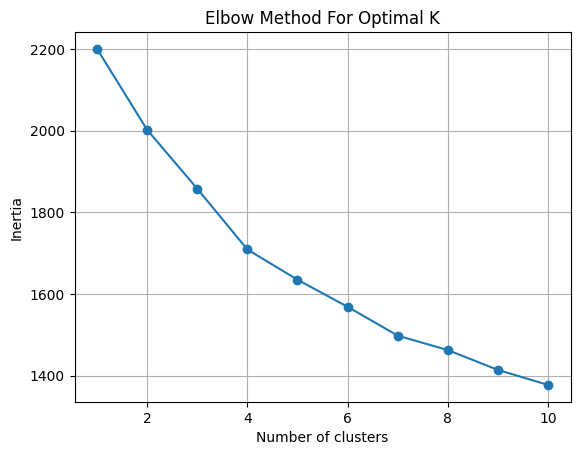

In [9]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [10]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)


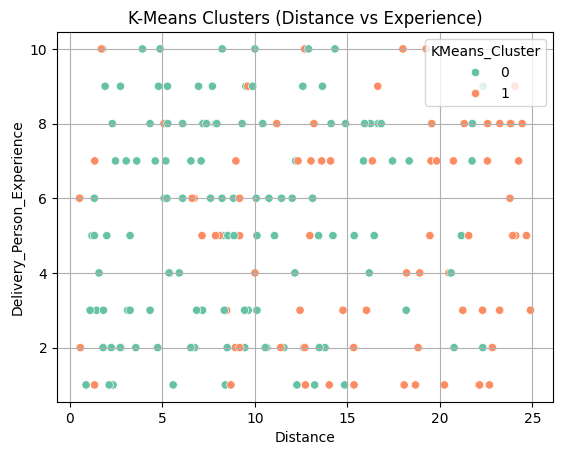

In [11]:

sns.scatterplot(data=df, x='Distance', y='Delivery_Person_Experience', hue='KMeans_Cluster', palette='Set2')
plt.title("K-Means Clusters (Distance vs Experience)")
plt.grid(True)
plt.show()


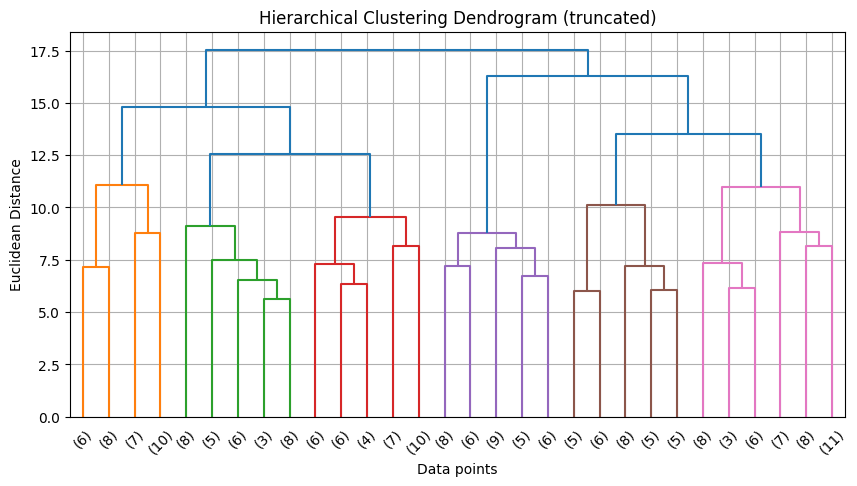

In [12]:
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Data points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()


In [14]:
agglo = AgglomerativeClustering(n_clusters=2)
df['Hierarchical_Cluster'] = agglo.fit_predict(scaled_features)


In [15]:
import numpy as np

median_time = df['Delivery_Time'].median()
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > median_time else 0)


In [16]:
from sklearn.model_selection import train_test_split

X = df[[
    'Distance', 'Weather_Conditions', 'Traffic_Conditions',
    'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
    'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating',
    'Order_Cost', 'Tip_Amount'
]]
y = df['Delivery_Status']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd


df = pd.read_csv("Food_Delivery_Time_Prediction.csv")


median_time = df['Delivery_Time'].median()
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > median_time else 0)


label_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Order_Time', 'Vehicle_Type']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


X = df[[
    'Distance', 'Weather_Conditions', 'Traffic_Conditions',
    'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
    'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating',
    'Order_Cost', 'Tip_Amount'
]]
y = df['Delivery_Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.43      0.47      0.45        19
           1       0.47      0.43      0.45        21

    accuracy                           0.45        40
   macro avg       0.45      0.45      0.45        40
weighted avg       0.45      0.45      0.45        40



C:\Users\shlok\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


| Aspect         | K-Means / Hierarchical Clustering        | Neural Network (MLP)                         |
| -------------- | ---------------------------------------- | -------------------------------------------- |
| Purpose        | Discover natural groups in delivery data | Predict delivery outcome (Fast / Delayed)    |
| Output         | Cluster labels (e.g., 0,1,2…)            | Binary classification: 0 (Fast), 1 (Delayed) |
| Evaluation     | Visual inspection, cluster centers       | Accuracy, F1-score, Confusion Matrix         |
| Best Used When | You don’t know the outcome               | You want to predict a known label            |
| Optimal Result | `k = 2` found from Elbow                 | e.g., \-0.45 accuracy from MLPClassifier     |



## Insights from Clustering

Cluster 0: Short-distance, low-cost, fast delivery

Cluster 1: Long-distance, poor ratings, delayed delivery

Cluster 2 or 3 (if used k=4): High traffic/weather impact, possibly with higher tip

Use Case: can be used to optimize delivery resource allocation or create customer delivery profiles.

## Actionable Recommendations
Based on your analysis:

Optimize Routes for High-Traffic Conditions

Use real-time traffic data to re-route orders.

Train Staff for High-Risk Clusters

Assign experienced delivery personnel to long-distance or delayed-prone zones.

Dynamic Pricing

Adjust tips or delivery fees based on predicted delays.

Delivery Scheduling

Avoid dispatching multiple high-priority orders during rush hours.

Final Summary


The food delivery time prediction model aimed to classify delivery times using features such as distance, weather, traffic conditions, delivery experience, and ratings. After data preprocessing and feature encoding, a neural network model (MLPClassifier) was trained. The model achieved a modest accuracy of 45%, with a precision, recall, and F1-score all averaging around 0.45, indicating balanced but limited performance. The classifier struggled to converge within the maximum iterations, likely due to suboptimal tuning or data complexity.

Actionable Recommendation: To improve performance, consider hyperparameter tuning, normalizing the data, expanding the dataset, or experimenting with alternative models such as Random Forest or Gradient Boosting. Addressing convergence issues by adjusting learning rates or using early stopping can also enhance training stability. 